In [ ]:
import findspark
findspark.init() 

In [51]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import mean as _mean, stddev as _stddev, count as _count, col, variance as _variance
from pyspark.sql import  functions as F
from ETL.Extract import *
from ETL.Transform import *
from matplotlib import pyplot as plt
import datetime

In [25]:
spark = SparkSession \
    .builder \
    .appName("Ep 2") \
    .getOrCreate()

In [26]:
df = spark.read.option("header", True).csv([ f"assets/raw/{x}/*.csv" for x in [1971, 1972] ])
df = transformColumns(df)
df = transformData(df)


df.toPandas().columns

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TEMP',
       'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP', 'SLP_ATTRIBUTES',
       'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES', 'MXSPD', 'GUST', 'MAX', 'MAX_ATTRIBUTES', 'MIN',
       'MIN_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNDP', 'FRSHTT'],
      dtype='object')

In [27]:
def mean(df, column_name, start_date, end_date):
    return df.filter((col("DATE") >= start_date) & \
                     (col("DATE") <= end_date)) \
             .select(_mean(column_name).alias(f'{column_name}_MEAN'))

In [28]:
def std(df, column_name, start_date, end_date):
    return df.filter((col("DATE") >= start_date) & \
                     (col("DATE") <= end_date)) \
             .select(_stddev(column_name).alias(f'{column_name}_STD'))

In [29]:
def variance(df, column_name, start_date, end_date):
    return df.filter((col("DATE") >= start_date) & \
                     (col("DATE") <= end_date)) \
             .select(_variance(column_name).alias(f'{column_name}_VARIANCE'))

In [30]:
def median(df, column_name, start_date, end_date):
    df = df.filter((col("DATE") >= start_date) & \
                     (col("DATE") <= end_date)) \
           .approxQuantile(column_name, [0.5],0.01)
    return df[0]

In [31]:
mean(df, "TEMP", datetime.datetime(2018, 1, 1), datetime.datetime(2018, 2, 1)).first().asDict()["TEMP_MEAN"]


In [32]:
median(df, "TEMP", datetime.datetime(2018, 1, 1), datetime.datetime(2018, 2, 1))

IndexError: list index out of range

In [ ]:
print("Bem vindo! ")

Bem vindo! 


In [ ]:
import os

In [ ]:
from matplotlib import pyplot as plt

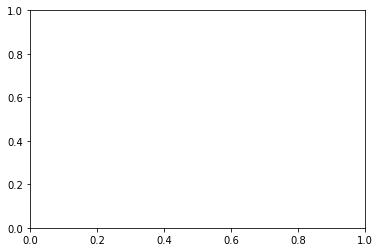

In [ ]:

res

,Date,TEMP_AVG
0,1,1.161290
1,2,-1.257857
2,3,5.985806
3,4,8.847667
4,5,16.001935
5,6,22.721333
6,7,23.581935
7,8,22.091613
8,9,19.566333
9,10,9.257742


In [ ]:
fig, ax = plt.subplots()
# ax.scatter(res["TEMP_AVG"], res["TEMP_AVG"])

NameError: name 'plt' is not defined

In [36]:
def mean2(df, x_column_name, y_column_name, start_date, end_date):
    return df.filter((col("DATE") >= start_date) & \
                     (col("DATE") <= end_date)) \
             .select(x_column_name, y_column_name)

In [41]:
mmq = mean2(df, "TEMP", "SLP" ,datetime.datetime(1971, 1, 1), datetime.datetime(1971, 5, 1)).toPandas()

In [42]:
from sklearn.linear_model import LinearRegression


In [43]:
model = LinearRegression()
model.fit(mmq[["TEMP"]], mmq[["SLP"]])

LinearRegression()

In [44]:
a = model.intercept_
b = model.coef_

In [46]:
b[0, 0]

44.87232962170354

In [47]:
a[0]

1064.7561650545886

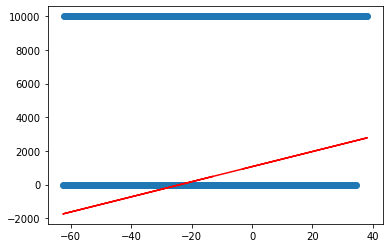

In [52]:
func = lambda x : a[0] + b[0]*x 
func_string = f"f(x) = {a[0]} + {b[0,0]}*x"
plt.plot(mmq[["TEMP"]], func(mmq[["TEMP"]]), c='red')
plt.scatter(mmq[["TEMP"]], mmq[["SLP"]])

In [58]:
def handle_mmq():
    data_frame = df

    start_date, end_date = datetime.datetime(1971, 1, 1), datetime.datetime(1971, 10, 1)

    x_column_name = "TEMP"
    y_column_name = "SLP"

    print("Carregando dados...")

    data = data_frame.filter((col("DATE") >= start_date) & \
                             (col("DATE") <= end_date)) \
                     .select(x_column_name, y_column_name).toPandas()

    print("Treinando modelo...")

    model = LinearRegression()
    model.fit(data[[x_column_name]], data[[y_column_name]])

    a = model.intercept_[0]
    b = model.coef_

    print("Treinamento finalizado...")

    print(f"O valor do intecept (a) é {a}")
    print(f"O valor do coeficiente (b) é {b[0, 0]}")
    function = lambda x : a + b*x
    print(f"A fórmula para a regressão linear para x: {x_column_name} e y: {y_column_name} é f(x)={a} + {b[0, 0]}*x")       
    
    fig, ax = plt.subplots()
    ax.plot(data[[x_column_name]], [a + b[0, 0]*x for x in data["TEMP"].to_numpy()], c='red')
    ax.scatter(data[[x_column_name]], data[[y_column_name]])
    
    stringDate = datetime.datetime.today().strftime("%d-%m-%Y-%H-%M-%S")
    graph_name = f"{stringDate}_mmq.png"
    fig.savefig(graph_name)

    print(f"O gráfico foi salvo em: {graph_name}")

    saveModel = input("Gostaria de salvar o modelo atual para uso futuro? (S/N): ")
    if(saveModel == 'S'):
        model_path = f"model/{stringDate}_mmq_{x_column_name}_{y_column_name}.joblib"
        model_dump(model, model_path)
        print(f"Seu modelo foi salvo em {model_path}")

Carregando dados...
Treinando modelo...
Treinamento finalizado...
O valor do intecept (a) é 852.0743912040186
O valor do coeficiente (b) é 30.126922146094504
A fórmula para a regressão linear para x: TEMP e y: SLP é f(x)=852.0743912040186 + 30.126922146094504*x
O gráfico foi salvo em: 31-07-2021-17-16-50_mmq.png


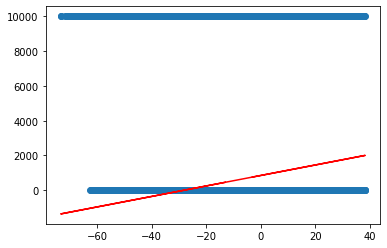

In [59]:
handle_mmq()

In [62]:
mmq["TEMP"].to_numpy()

array([ -3.06,   3.28,   2.89, ...,   2.5 ,  12.33, -13.06])

In [71]:
for field in df.schema.fields:
    print(f"{field.name} -> {field.dataType}") 

STATION -> StringType
DATE -> DateType
LATITUDE -> FloatType
LONGITUDE -> FloatType
ELEVATION -> FloatType
NAME -> StringType
TEMP -> DoubleType
TEMP_ATTRIBUTES -> IntegerType
DEWP -> DoubleType
DEWP_ATTRIBUTES -> IntegerType
SLP -> DoubleType
SLP_ATTRIBUTES -> IntegerType
STP -> DoubleType
STP_ATTRIBUTES -> IntegerType
VISIB -> DoubleType
VISIB_ATTRIBUTES -> IntegerType
WDSP -> DoubleType
WDSP_ATTRIBUTES -> IntegerType
MXSPD -> DoubleType
GUST -> DoubleType
MAX -> DoubleType
MAX_ATTRIBUTES -> FloatType
MIN -> DoubleType
MIN_ATTRIBUTES -> FloatType
PRCP -> DoubleType
PRCP_ATTRIBUTES -> StringType
SNDP -> DoubleType
FRSHTT -> StringType
